# Librería

In [103]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Datos

In [2]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data = pd.read_csv(url)

# Primera Exploración

In [3]:
df = data.copy()

In [4]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
df.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [7]:
df.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [8]:
df.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rowid,344.0,NaN,NaN,NaN,172.5,99.448479,1.0,86.75,172.5,258.25,344.0
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bill_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,200.915205,14.061714,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,333,2,male,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,344.0,NaN,NaN,NaN,2008.02907,0.818356,2007.0,2007.0,2008.0,2009.0,2009.0


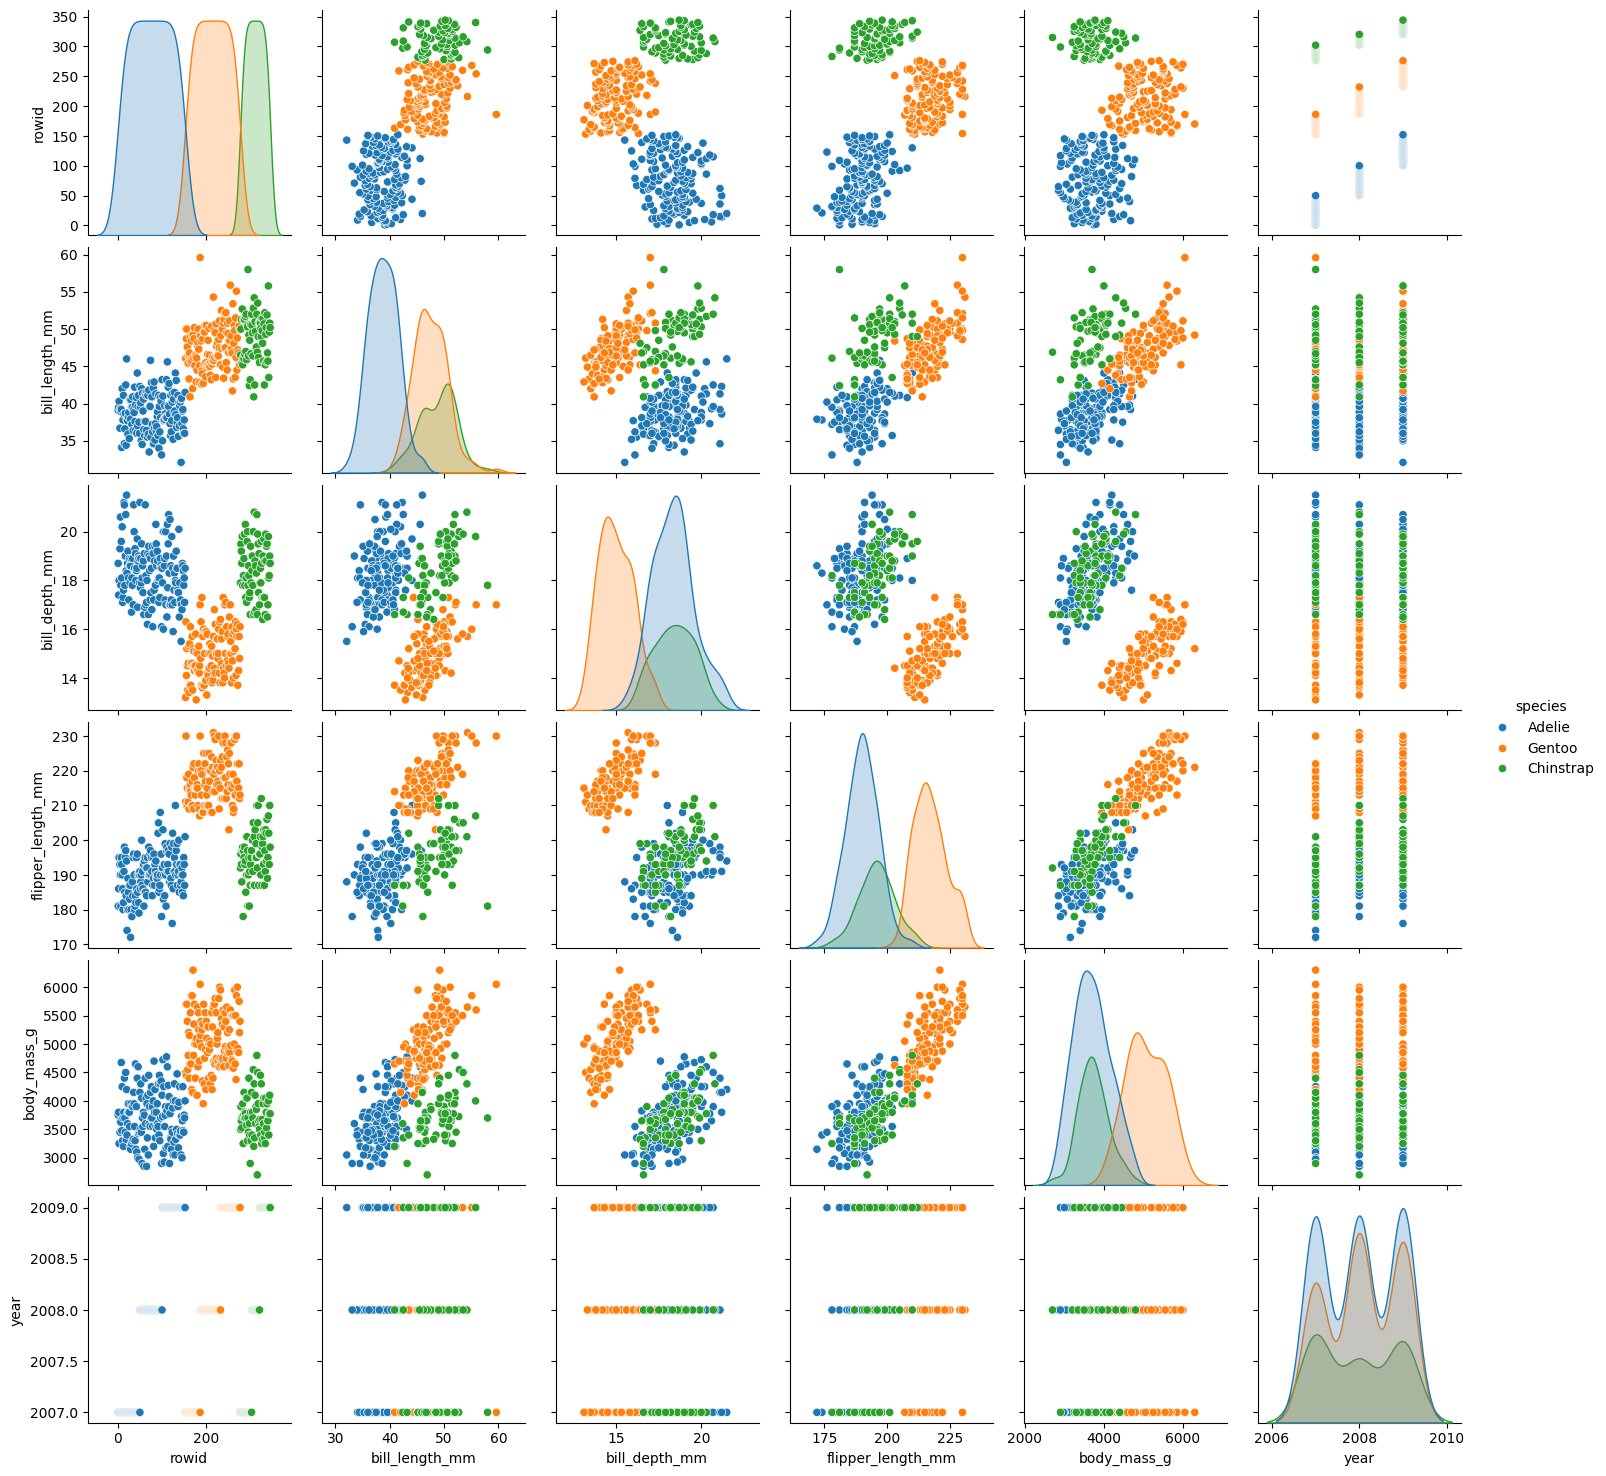

In [10]:
sns.pairplot(df, hue='species')

# Mini-EDA

In [11]:
df.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [22]:
df.sex.unique()

array(['male', 'female', nan], dtype=object)

<Axes: >

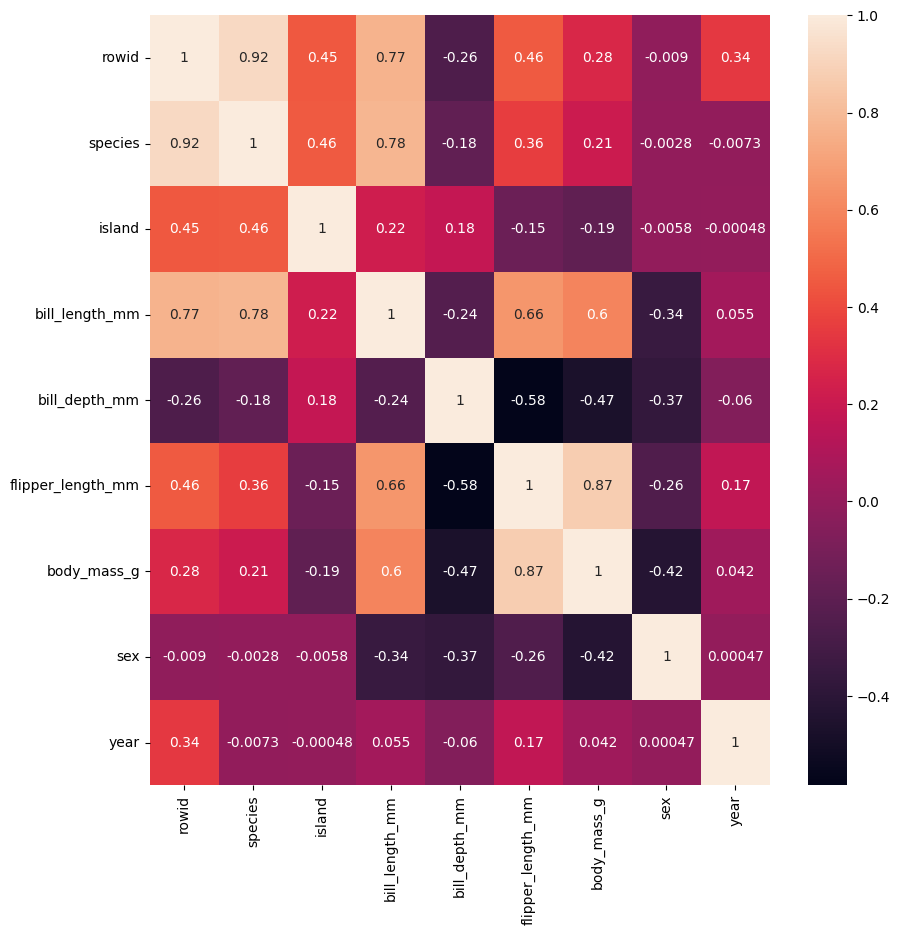

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2,'Torgersen':0, 'Biscoe':1, 'Dream':2, 'male':0, 'female':1}).corr(numeric_only=True), annot=True)

<Axes: xlabel='species', ylabel='percent'>

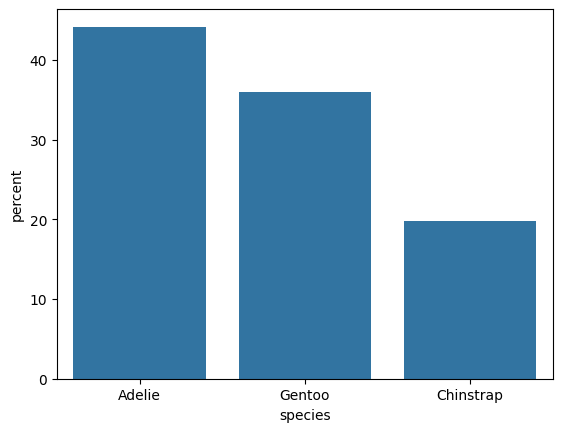

In [25]:
sns.countplot(x='species', data=df, stat='percent')

In [14]:
df['species'].value_counts()/len(df.species)

species
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: count, dtype: float64

<Axes: xlabel='island', ylabel='count'>

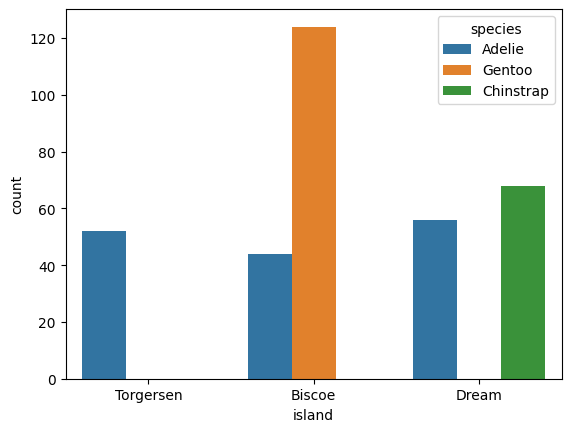

In [15]:
sns.countplot(x='island',hue='species', data=df)

# Tratamiento de datos

In [16]:
df[df.isna().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [17]:
df_1 = df.dropna()
df_1['species'].value_counts()/len(df_1.species)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: count, dtype: float64

In [18]:
df_2 = df.copy()
df_2['bill_length_mm'].fillna(df_2['bill_length_mm'].mean(), inplace=True)
df_2['bill_depth_mm'].fillna(df_2['bill_depth_mm'].mean(), inplace=True)
df_2['flipper_length_mm'].fillna(df_2['flipper_length_mm'].median(), inplace=True)
df_2['body_mass_g'].fillna(df_2['body_mass_g'].median(), inplace=True)
df_2['sex'].fillna(df_2['sex'].mode()[0], inplace=True)
df_2.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [19]:
from scipy.spatial.distance import euclidean

df_3 = df.copy()

df_3.dropna(thresh=5, inplace=True)

datos_imp = df.groupby(['species','sex','island'])[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].aggregate(
    {'bill_length_mm':'mean','bill_depth_mm':'mean','flipper_length_mm':'median','body_mass_g':'median'}).reset_index()
datos_imp


def impute_sex(row):
    if pd.isna(row['sex']):
        filas_relevantes = datos_imp[(datos_imp['species'] == row['species']) & (datos_imp['island'] == row['island'])]
        min_distancia = float('inf')
        sex_a_imputar = None

        for _, r_row in filas_relevantes.iterrows():
            distancia = euclidean(row[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(0),
                                 r_row[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
            if distancia < min_distancia:
                min_distancia = distancia
                sex_a_imputar = r_row['sex']
        
        return sex_a_imputar
    else:
        return row['sex']
    
df_3['sex'] = df_3.apply(impute_sex, axis=1)

df_3[df_3.isna().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


# División de datos

In [79]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop(columns='species'), df_1['species'], test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2.drop(columns='species'), df_2['species'], test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_3.drop(columns='species'), df_3['species'], test_size=0.2, random_state=42)

# Escalado

species --> mapeo
sex ---> onehot encoder
island ---> label encoder
bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g ----> minmax scaler
rowid ---> eliminar
year ---> no le hago nada por ahora

In [80]:
X_train_1.drop(columns='rowid', inplace=True)
X_test_1.drop(columns='rowid', inplace=True)

In [81]:
mapeo_species = {'Adelie':0, 'Gentoo':1, 'Chinstrap':2}
y_train_1 = y_train_1.map(mapeo_species)
y_test_1 = y_test_1.map(mapeo_species)

In [82]:
le = LabelEncoder()
X_train_1['island'] = le.fit_transform(X_train_1['island'])
X_test_1['island'] = le.transform(X_test_1['island'])

In [83]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe.fit(X_train_1[['sex']])

transformed_X_train = ohe.transform(X_train_1[['sex']])
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(['sex']), index=X_train_1.index)
X_train_sca_ohe = pd.concat([X_train_1, transformed_df], axis=1).drop(columns='sex')

transformed_X_val = ohe.transform(X_test_1[['sex']])
transformed_df = pd.DataFrame(transformed_X_val, columns=ohe.get_feature_names_out(['sex']), index=X_test_1.index)
X_test_sca_ohe = pd.concat([X_test_1, transformed_df], axis=1).drop(columns='sex')

In [84]:
col_minmax = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

minmax = MinMaxScaler()

minmax.fit(X_train_sca_ohe[col_minmax])

X_train_sca_minmax = minmax.transform(X_train_sca_ohe[col_minmax])
X_train_sca_ohe[col_minmax] = X_train_sca_minmax

X_test_sca_minmax = minmax.transform(X_test_sca_ohe[col_minmax])
X_test_sca_ohe[col_minmax] = X_test_sca_minmax

In [87]:
# Definir las columnas para OneHotEncoder y MinMaxScaler
col_onehot = ['sex']
col_minmax = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
col_label = ['island']

# Crear pipelines para cada transformador
ohe_pipeline = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'))
minmax_pipeline = make_pipeline(MinMaxScaler())
label_pipeline = make_pipeline(LabelEncoder())

# Combinar los pipelines con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', ohe_pipeline, col_onehot),
        ('minmax', minmax_pipeline, col_minmax),
        ('label', label_pipeline, col_label)
    ],
    remainder='passthrough'  # Descartar las columnas no especificadas
)

# Columnas a conservar (excluyendo 'rowid')
columns_to_keep = ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

# Ajustar y transformar los datos de entrenamiento y prueba
X_train_processed = preprocessor.fit_transform(X_train_2[columns_to_keep])
X_test_processed = preprocessor.transform(X_test_2[columns_to_keep])

# Convertir a DataFrame si es necesario
X_train_df = pd.DataFrame(X_train_processed, index=X_train_2.index, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_processed, index=X_test_2.index, columns=preprocessor.get_feature_names_out())

# BaseLines y Selección de modelo

In [92]:
modelos = {
    "Logistic Regression": LogisticRegression(),
    "SVC_linear": SVC(kernel='linear'),
    "SVC_poly": SVC(kernel='poly',degree=4),
    "SVC_rbf": SVC(),
}

# Define las métricas a usar
metricas = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train_sca_ohe, y_train_1, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])

resultados_df.T

,0
Logistic Regression_accuracy,0.981272
Logistic Regression_f1_macro,0.976930
Logistic Regression_recall_macro,0.970435
Logistic Regression_precision_macro,0.985960
Logistic Regression_roc_auc_ovr,0.998491
SVC_linear_accuracy,0.969951
SVC_linear_f1_macro,0.959259
SVC_linear_recall_macro,0.950435
SVC_linear_precision_macro,0.973000
SVC_linear_roc_auc_ovr,NaN


# Entrenar

In [93]:
log_reg = LogisticRegression()
log_reg.fit(X_train_sca_ohe, y_train_1)
y_pred_train = log_reg.predict(X_train_sca_ohe)

In [95]:
print(classification_report(y_train_1, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       115
           1       0.98      1.00      0.99       101
           2       1.00      0.84      0.91        50

    accuracy                           0.96       266
   macro avg       0.97      0.94      0.95       266
weighted avg       0.96      0.96      0.96       266



# Predicción

In [98]:
y_pred = log_reg.predict(X_test_sca_ohe.drop(columns='rowid'))

In [111]:
mapeo_species

{'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}

In [110]:
y_pred

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       0], dtype=int64)

# Validar mi modelo

In [99]:
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      1.00      1.00        18
           2       1.00      0.78      0.88        18

    accuracy                           0.94        67
   macro avg       0.96      0.93      0.94        67
weighted avg       0.95      0.94      0.94        67



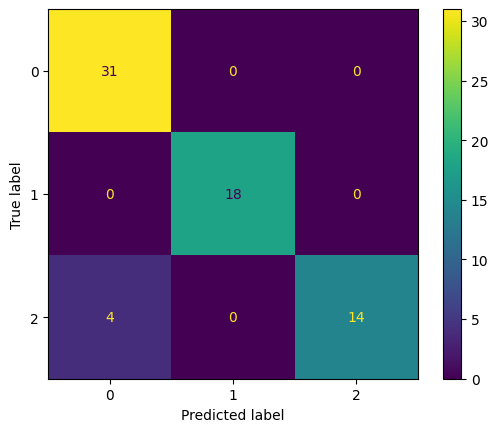

In [101]:
ConfusionMatrixDisplay(confusion_matrix(y_test_1, y_pred)).plot()

In [106]:
multilabel_confusion_matrix(y_test_1, y_pred)[0]

array([[32,  4],
       [ 0, 31]], dtype=int64)

<Axes: >

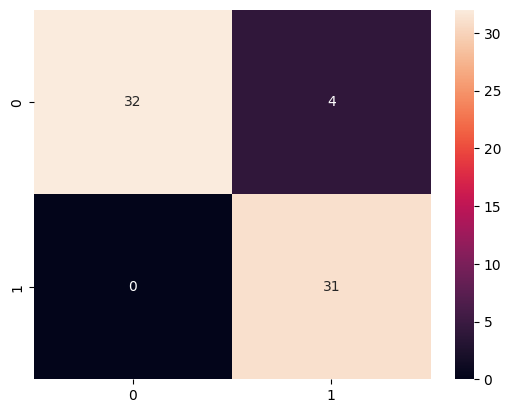

In [109]:
sns.heatmap(multilabel_confusion_matrix(y_test_1, y_pred)[0], annot=True)

In [105]:
print(log_reg.intercept_)
print(log_reg.coef_)

[-0.00108257  0.00017104  0.00091153]
[[ 1.01172561e+00 -4.27586527e+00  1.14632449e+00 -1.83875258e+00
  -8.33060707e-01  1.26476054e-03 -7.55383141e-01  7.54350683e-01]
 [-2.28568613e+00  1.10350195e+00 -2.01774488e+00  2.03059663e+00
   1.75263228e+00 -2.69172508e-04  3.96477865e-01 -3.96265147e-01]
 [ 1.27396052e+00  3.17236332e+00  8.71420395e-01 -1.91844051e-01
  -9.19571568e-01 -9.95588029e-04  3.58905275e-01 -3.58085536e-01]]
